## The Auto Regressive (AR) model

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts

In [ ]:
### importing data and preprocessing

In [5]:
raw_data = pd.read_csv('Index2018.csv')
df_comp = raw_data.copy()
df_comp['date']=pd.to_datetime(df_comp['date'],dayfirst=True)
df_comp.set_index('date',inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [7]:
df_comp['market_value'] = df_comp.ftse

In [8]:
df_comp

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01,3445.980000
1994-01-10,475.270000,2225.00,3440.580000,18443.44,3440.580000
1994-01-11,474.130000,2228.10,3413.770000,18485.25,3413.770000
1994-01-12,474.170000,2182.06,3372.020000,18793.88,3372.020000
1994-01-13,472.470000,2142.37,3360.010000,18577.26,3360.010000
...,...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,7731.827774
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,7643.428966
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,7615.839954


In [9]:
df_comp.drop(['spx','dax','ftse','nikkei'],inplace=True,axis=1)

In [11]:
train_size = int(len(df_comp)*0.8)
df = df_comp.iloc[:train_size]
df_test = df_comp.iloc[train_size:]

In [14]:
len(df_comp)==len(df)+len(df_test)

True

### The ACF

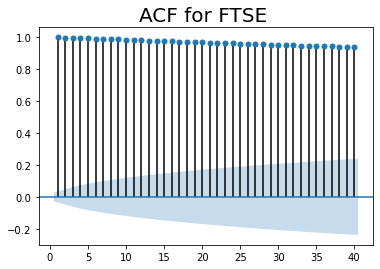

In [15]:
sgt.plot_acf(df['market_value'],lags=40,zero=False)
plt.title('ACF for FTSE ',fontsize=20)
plt.show()

In [16]:
## all the lags are postive between 0.9 and 1 and are slowly declining --- the effect barely deteriorate over time
## also they are significantly different than zero

## the two time series are similar in a way they behave and the way past value affects the present one


In [ ]:
## generally we prefer parsimonious model since they make for more reasonable predictors and prevent us from overfitting
## the data

In [17]:
## the more lags we include the better our model fit the data set we feed it -- problem: the coefficients might
## predict the dataset too well -- makes the model prone to mistakes while trying to forcast future values


### The PACF

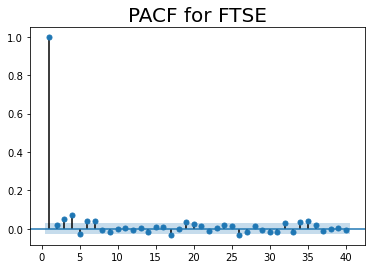

In [25]:
sgt.plot_pacf(df['market_value'],lags=40,zero=False,method=('ols'))
plt.title("PACF for FTSE",fontsize=20)
plt.show()

In [27]:
### interpretation:
### coefficients of different sizes (not all between 0.9 and 1)
### coefficients that are negative
### coefficients that are not significant


### coefficients from 25th lag onwards are not significant so we can just ignore them
### coefficients value will be extremely close to zero, their impact on the model is minimal,
## so they are not relevant to us

## thus our model should include less than 25 lag

In [29]:
## most values after 22nd lag are negative because::: the frequency of the data is in business day and there are roughly
## 22 business day in a month we can anticipate some cyclical changes every month

## the values a month ago negatively affec the value today

In [30]:
### we are certain tha the value of our first lag is greatly significant thus we must include it in our model

### The AR(1) model

In [31]:
model_ar = ARMA(df['market_value'],order=(1,0))

In [32]:
result_ar = model_ar.fit() #finds the most appropriate values for the coeff

In [33]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.603
Method:                       css-mle   S.D. of innovations             59.258
Date:                Sat, 16 Jan 2021   AIC                          55251.205
Time:                        19:25:01   BIC                          55270.769
Sample:                    01-07-1994   HQIC                         55258.061
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5087.1410    482.201     10.550      0.000    4142.043    6032.238
ar.L1.market_value     0.9985      0.001   1295.142      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0016           +0.0000j            1.0016            0.0000
-----------------------------------------------------------------------------
"""

In [34]:
## interpretation:
## the p-values for both the constant and coeff are very close to 0, we can say they are significantly diffrernt than 0
## thus our model is significant

## for better accuracy let us try plots with higher lags for better accuracy

In [35]:
## let us see if a more complex model will be a btter estimator: 

### AR(2) model

In [36]:
model_ar_2 = ARMA(df['market_value'],order=(2,0))
result_ar_2 = model_ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.866
Method:                       css-mle   S.D. of innovations             59.249
Date:                Sat, 16 Jan 2021   AIC                          55251.732
Time:                        19:38:12   BIC                          55277.818
Sample:                    01-07-1994   HQIC                         55260.873
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5054.5452    494.695     10.217      0.000    4084.960    6024.130
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4620           +0.0000j           58.4620            0.5000
-----------------------------------------------------------------------------
"""

In [38]:
## the p-value for the 2nd coeff is 0.211 >0.05,, thus reject the null hypothesis
## the coeff phi2 is not significanlty differernt than zero -- thus we assume it is equal to zero
## price 2 days ago do not severely affect the price today


## possible explanation::

## all the effects they ahve is capture in yesterdays price thus adding additional info does not provide significant value


## but before reching the final conclusion,, test ar(3) and ar(4) model

In [39]:
## usually the more lag we include the better our prediction becomes,, however we run the risk of overfitting

In [40]:
## log-likelihood test -- tells if the more complex model are worth using

### AR(3) model

In [41]:
model_ar_3 = ARMA(df['market_value'],order=(3,0))
result_ar_3 = model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27616.087
Method:                       css-mle   S.D. of innovations             59.180
Date:                Sat, 16 Jan 2021   AIC                          55242.174
Time:                        19:45:26   BIC                          55274.781
Sample:                    01-07-1994   HQIC                         55253.600
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5394.2648    704.921      7.652      0.000    4012.645    6775.885
ar.L1.market_value     0.9806      0.014     69.645      0.000       0.953       1.008
ar.L2.market_value    -0.0308      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.470      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           -0.0000j            1.0012           -0.0000
AR.2           -0.1855           -4.5136j            4.5174           -0.2565
AR.3           -0.1855           +4.5136j            4.5174            0.2565
-----------------------------------------------------------------------------
"""

In [43]:
### Generally, we prefer model with higher Log-Likelihood but lower Information Criterion

In [44]:
### also, we need to use LLratio test to see whether the two models are significantly different

### AR(4) model

In [42]:
model_ar_4 = ARMA(df['market_value'],order=(4,0))
result_ar_4 = model_ar_4.fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Sat, 16 Jan 2021   AIC                          55217.130
Time:                        19:46:00   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    559.963      9.089      0.000    3992.133    6187.149
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

### LLR Test 

In [45]:
def llr_test(model_1,model_2,df=1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,df).round(3)
    return p

### Comparing Higher lag AR models

In [46]:
llr_test(model_ar_2,model_ar_3)

0.001

In [47]:
## we see that the difference in log-likelihood is significant 
## this suggest we should opt for the more complicated model

In [48]:
llr_test(model_ar_3,model_ar_4)

0.0

In [49]:
## this is also significant
## thus we should fit more complicated model and check if gives distingushably greater log-likelihood until we 
## reach a model where it does not

In [51]:
model_ar_4 = ARMA(df['market_value'],order=(4,0))
result_ar_4 = model_ar_4.fit()
print(result_ar_4.summary())
print('LLR test: '+str(llr_test(model_ar_3,model_ar_4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Sat, 16 Jan 2021   AIC                          55217.130
Time:                        21:27:09   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    559.963      9.089      0.000    3992.133    6187.149
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value  

In [52]:
model_ar_5 = ARMA(df['market_value'],order=(5,0))
result_ar_5 = model_ar_5.fit()
print(result_ar_5.summary())
print('LLR test: '+str(llr_test(model_ar_4,model_ar_5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Sat, 16 Jan 2021   AIC                          55214.697
Time:                        21:29:49   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    543.541      9.364      0.000    4024.321    6154.961
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value  

In [54]:
model_ar_6 = ARMA(df['market_value'],order=(6,0))
result_ar_6 = model_ar_6.fit()
print(result_ar_6.summary())
print('LLR test: '+str(llr_test(model_ar_5,model_ar_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Sat, 16 Jan 2021   AIC                          55208.947
Time:                        21:31:00   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    565.201      9.005      0.000    3981.867    6197.415
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value  

In [55]:
model_ar_7 = ARMA(df['market_value'],order=(7,0))
result_ar_7 = model_ar_7.fit()
print(result_ar_7.summary())
print('LLR test: '+str(llr_test(model_ar_6,model_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Sat, 16 Jan 2021   AIC                          55201.799
Time:                        21:31:32   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    589.570      8.633      0.000    3934.106    6245.177
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [56]:
model_ar_8 = ARMA(df['market_value'],order=(8,0))
result_ar_8 = model_ar_8.fit()
print(result_ar_8.summary())
print('LLR test: '+str(llr_test(model_ar_7,model_ar_8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Sat, 16 Jan 2021   AIC                          55203.478
Time:                        21:32:07   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    585.002      8.700      0.000    3943.059    6236.223
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value  

In [58]:
## the p-value for 8th lag is indeed insignificant and LLR p-value is 0.57... both of these information suggest
## that including the prices 8th periods ago does not improve our model in any notable way
## thus we stop at ar_7 even though it may contain some non-significant values

In [59]:
## since the simple ar model served as the good model, we shoulf use LLR test once again to make sure adding
## 6 additional lag is worth it

print('LLR test: ', llr_test(model_ar,model_ar_7,df=6)) # 7-1=6



LLR test:  0.0


In [61]:
## not surprisingly, the complex model yield significantly greater log-likelihood so we decided to stick to it


## it seems that the more lag we introduced the better our model becomes  -- lower log likelihood value
## this is often the case wehn using AR model to predict non-stationary data

## TO AVOID SUCH ISSUE WE SHOULD USE STATIONARY TIME-SERIES

### The DFTest

test to check the stationarity in the data

In [63]:
sts.adfuller(df['market_value'])

(-1.9041551418836873,
 0.330108932770283,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

In [67]:
## p-value is: 0.33 thus we can't quite say that the data comes from stationarity process

## thus we can assume it is extracted from non-statinarity process. this means:

## we should not rely on AR model to make accurate forcast
## thus what we can do is transform the dataset so that it fits stationary assumptions

In [ ]:
## In finance, the common approach is to use returns insted of prices when measuring financial indices

### Using Returns

In [ ]:
## convert prices to return -- so that non-stationarity data becomes stationarity

In [68]:
df['returns'] = df['market_value'].pct_change(1).mul(100) 
# distance in time between the periods we want to compare and convert it to percent 0.02 -> 2% by multiplying with 100
## since we don't have return value for the first period, we only take the rest of the row except for first
df = df.iloc[1:] 

<ipython-input-68-e43035955d04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df['market_value'].pct_change(1).mul(100)


In [69]:
# again check for stationarity

sts.adfuller(df['returns'])

(-12.7702657194972,
 7.79805833603984e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

In [70]:
## now since we have very low p-value and ststistic is even far left of 99% confidence --
## we can say that the data comes from stationary process

### ACF and PACF of Returns

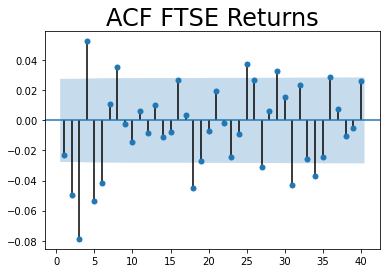

In [72]:
sgt.plot_acf(df['returns'],lags=40,zero=False)
plt.title("ACF FTSE Returns",size=24)
plt.show()

In [ ]:
## interpretation:

## not all coefficeints are postive 
## not all coefficients are significant
## values greatly varies in magnitude instead of all being close to 1
## first few lags are significant bu their coeff are negative ---- consecutive value moves in different direction

## returns over the entire week are relevant to those of current ones 
## since the relationship is negative we can interpret this as some form of natural adjustment occuring in the market 

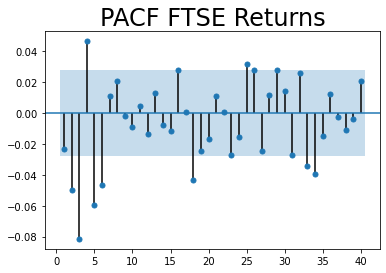

In [74]:
sgt.plot_pacf(df['returns'],lags=40,zero=False,method=('ols'))
plt.title("PACF FTSE Returns",size=24)
plt.show()

In [ ]:
## similar to ACF plot
## prices today often move in the direction oppostite to prices yesterday
# hence we tend to get price increases folling price decreses (later_low-initial_high) which falls in line with our
## expectation o cyclical changes 

## the further back we go the less relevant the coefficients values should be 
## This is beacuse the majority of effects they have on current value should already be accounted for due to the 
## recursive nature of auto-regressive model

### AR(1) Model for Returns

In [75]:
model_ret_ar_1 = ARMA(df['returns'],order=(1,0))
result_ret_ar_1 = model_ret_ar_1.fit()
result_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 16 Jan 2021   AIC                          15865.497
Time:                        22:22:32   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

In [77]:
## p-value of both parameters are greater than 0.05 --> thus neither is significantly different than zero
## thus this model holds no real predictive power
## the more easily the yesterday's price is affected by higher lags,, the more inaccurate it's coeff becomes i.e phi_1
## this is beacuse of accumulated compounding effect of lagged coefficients--> this directly decreses the predictive
## power of the model

### Higher lag AR model for Returns 

In [78]:
model_ret_ar_2 = ARMA(df['returns'],order=(2,0))
result_ret_ar_2 = model_ret_ar_2.fit()
result_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sat, 16 Jan 2021   AIC                          15854.911
Time:                        22:27:38   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [80]:
## we can see that the p-value for second lag is zero ,, this means phi_2 is significantly different from zero
## and should be included in the model
## p-value for first lag has decresed from 0.103 to 0.086-- may be inclusing more lag would make it significant?

## since the p-value of the new coeff is zero, we suspect that cahnge in log-likelihood is also significant

In [81]:
llr_test(model_ret_ar_1,model_ret_ar_2)

0.0

In [83]:
## we get the p-value of less than 1% which supports the claim that this model is better thna the previous one

### also all IC's for this model(2) is lower than the previous model AR1 -- which further supports our claim

In [84]:
model_ret_ar_3 = ARMA(df['returns'],order=(3,0))
result_ret_ar_3 = model_ret_ar_3.fit()
result_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Sat, 16 Jan 2021   AIC                          15823.477
Time:                        22:51:56   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [85]:
## all of the coefficients related to past values are significant at 5% level 
## since the p-value for the newest lag i.e 3rd lag is 0 ,, we expect the LLR test to suggest this model is bettr than
## the previous one

In [86]:
llr_test(model_ret_ar_2,model_ret_ar_3)

0.0

In [88]:
## thus the two log-likelihood are distinctly different 
## all the IC's are lower once again 
## thus we can say this model outperforms its simpler counterpart model2

In [98]:
## we should repeat the process until the additional coefficeint is insignificant 
## the LLR test fails and we get higher AIC and BIC values

In [90]:
model_ret_ar_4 = ARMA(df['returns'],order=(4,0))
result_ret_ar_4 = model_ret_ar_4.fit()
result_ret_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sat, 16 Jan 2021   AIC                          15814.661
Time:                        22:56:48   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     -3.531      0.000      -0.077      -0.022
ar.L3.returns    -0.0802      0.014     -5.701      0.000      -0.108      -0.053
ar.L4.returns     0.0464      0.014      3.291      0.001       0.019       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8888           -0.0000j            1.8888           -0.5000
AR.2            0.3231           -1.9331j            1.9599           -0.2236
AR.3            0.3231           +1.9331j            1.9599            0.2236
AR.4            2.9701           -0.0000j            2.9701           -0.0000
-----------------------------------------------------------------------------
"""

In [91]:
llr_test(model_ret_ar_3,model_ret_ar_4)

0.001

In [92]:
model_ret_ar_5 = ARMA(df['returns'],order=(5,0))
result_ret_ar_5 = model_ret_ar_5.fit()
result_ret_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 16 Jan 2021   AIC                          15798.779
Time:                        22:57:29   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     -3.865      0.000      -0.082      -0.027
ar.L3.returns    -0.0831      0.014     -5.914      0.000      -0.111      -0.056
ar.L4.returns     0.0449      0.014      3.190      0.001       0.017       0.073
ar.L5.returns    -0.0596      0.014     -4.232      0.000      -0.087      -0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5481           -0.0000j            1.5481           -0.5000
AR.2           -0.2860           -1.7252j            1.7487           -0.2761
AR.3           -0.2860           +1.7252j            1.7487            0.2761
AR.4            1.4366           -1.2157j            1.8819           -0.1118
AR.5            1.4366           +1.2157j            1.8819            0.1118
-----------------------------------------------------------------------------
"""

In [93]:
llr_test(model_ret_ar_4,model_ret_ar_5)

0.0

In [94]:
model_ret_ar_6 = ARMA(df['returns'],order=(6,0))
result_ret_ar_6 = model_ret_ar_6.fit()
result_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 16 Jan 2021   AIC                          15789.890
Time:                        22:58:00   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     -3.716      0.000      -0.080      -0.025
ar.L3.returns    -0.0870      0.014     -6.174      0.000      -0.115      -0.059
ar.L4.returns     0.0424      0.014      3.009      0.003       0.015       0.070
ar.L5.returns    -0.0607      0.014     -4.309      0.000      -0.088      -0.033
ar.L6.returns    -0.0466      0.014     -3.302      0.001      -0.074      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2869           -0.9022j            1.5716           -0.0973
AR.2            1.2869           +0.9022j            1.5716            0.0973
AR.3           -0.0727           -1.5282j            1.5299           -0.2576
AR.4           -0.0727           +1.5282j            1.5299            0.2576
AR.5           -1.8659           -0.4836j            1.9275           -0.4596
AR.6           -1.8659           +0.4836j            1.9275            0.4596
-----------------------------------------------------------------------------
"""

In [95]:
llr_test(model_ret_ar_5,model_ret_ar_6)

0.001

In [96]:
model_ret_ar_7 = ARMA(df['returns'],order=(7,0))
result_ret_ar_7 = model_ret_ar_7.fit()
result_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 16 Jan 2021   AIC                          15791.294
Time:                        22:58:55   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.returns    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.returns    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2269           -0.0000j            5.2269           -0.0000
-----------------------------------------------------------------------------
"""

In [97]:
llr_test(model_ret_ar_6,model_ret_ar_7)

0.44

In [101]:
## we should repeat the process until the additional coefficeint is insignificant 
## the LLR test fails and we get higher AIC and BIC values..
## thus we stop here and opt for the simpler model i.e model 6

### Normalizing a dataset

In [103]:
benchmark = df['market_value'].iloc[0]

## setting benchmark as this value (for comparision and this is random)

In [104]:
df['norm'] = df['market_value'].div(benchmark).mul(100)

<ipython-input-104-97a24c78d14b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm'] = df['market_value'].div(benchmark).mul(100)


In [105]:
# since AR model works best with stationary data let's check is the normalized price is stationary using dftest

sts.adfuller(df['norm'])

(-1.8928710132672344,
 0.33542220743300755,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [107]:
## since p-val = 0.33542220743300755 >0.05 thus not-stationarity
## Thus normalizing price did not result stationarity data

## thus we will not be able to use AR model with the normalized prices

### Normalizing Returns

In [108]:
## normalizng returns account for absolute profitablity of the investment in cotrast to prices
## also they allow us to compare relative profitability as opposed to non-normalized returns

In [109]:
bench_ret = df['returns'].iloc[0]
df['norm_ret'] = df['returns'].div(bench_ret).mul(100)

<ipython-input-109-22138bf1f3e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_ret'] = df['returns'].div(bench_ret).mul(100)


In [110]:
## since the series 'norm_ret' is derived from return series which was also stationarity,, we suspect this will be
## stationarity as well

In [111]:
sts.adfuller(df['norm_ret'])

(-12.77026571949722,
 7.798058336038942e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

In [ ]:
## smaller p-value suggest that the indeed it is stationary 

### NORMALIZING DOES NOT AFFECT STATIONARITY

In [112]:
model_norm_ret_ar_1 = ARMA(df['norm_ret'],order=(1,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40351.743
Method:                       css-mle   S.D. of innovations            749.388
Date:                Sat, 16 Jan 2021   AIC                          80709.487
Time:                        23:28:42   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731     10.339     -1.158      0.247     -32.237       8.291
ar.L1.norm_ret    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

In [113]:
## the p-alue are both greater than .1 so we cant be conclusively certain they are non-zero

## also we can observe all the values are same as the non-normalized return we had done previously,,
## if this perisist we can safely assume that normalizing has no effect in model selection

## let us go one step further and see for model_2


In [114]:
model_norm_ret_ar_2 = ARMA(df['norm_ret'],order=(2,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -40345.450
Method:                       css-mle   S.D. of innovations            748.449
Date:                Sat, 16 Jan 2021   AIC                          80698.901
Time:                        23:32:38   BIC                          80724.985
Sample:                    01-10-1994   HQIC                         80708.041
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      9.834     -1.218      0.223     -31.247       7.301
ar.L1.norm_ret    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.norm_ret    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [115]:
## non-normalized model_2 summary statistics

result_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sat, 16 Jan 2021   AIC                          15854.911
Time:                        23:33:14   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

### NORMALIZING HAS IMPACT ONLY ON CONSTANT BUT NOT ON ANY OF THE LAGGED COEFFICIENTS

In [116]:
## thus we can assume that the model that failed for regualr retuern also fails for noemlaized returns

In [117]:
model_norm_ret_ar_7 = ARMA(df['norm_ret'],order=(7,0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -40308.642
Method:                       css-mle   S.D. of innovations            742.977
Date:                Sat, 16 Jan 2021   AIC                          80635.283
Time:                        23:36:06   BIC                          80693.974
Sample:                    01-10-1994   HQIC                         80655.849
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.630     -1.387      0.165     -28.887       4.941
ar.L1.norm_ret    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.norm_ret    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.norm_ret    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.norm_ret     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.norm_ret    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.norm_ret    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.norm_ret     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2270           -0.0000j            5.2270           -0.0000
-----------------------------------------------------------------------------
"""

In [118]:
## thus let us stick with ar_6 model reather than ar_7

##### USiNG NORMALIZED VALUE HAS NO IMPACT ON MODEL SELECTION

### Analysing the residuals

In [119]:
## we have obeserved that for price/market_value --- AR_7 was the best model to fit for prices 

In [120]:
df['resid_price'] = result_ar_7.resid

<ipython-input-120-2d03568c17cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_price'] = result_ar_7.resid


In [121]:
### let's see the mean and variance of the residuals

In [122]:
df['resid_price'].mean() ## mean close to zero-- suggest on avegare our model performs well

0.6797378109237515

In [124]:
df.resid_price.var() ## high var suggest that the residulas are not concentrated around the mean of 0 but are all over the place

3468.1257869556716

In [125]:
## this is becuse AR model performs porrly when predicting non-stationary data (price in this case)

In [126]:
## to see if the timeseries is stationary run DF test

In [127]:
sts.adfuller(df['resid_price'])

(-70.81714120361143,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54832.41967732204)

In [129]:
## since p-value is 0, this suggest stationarity
## so the error term fit our epectations so far

In [130]:
## coeff for autocorrelation function of white noise should all be zero... 

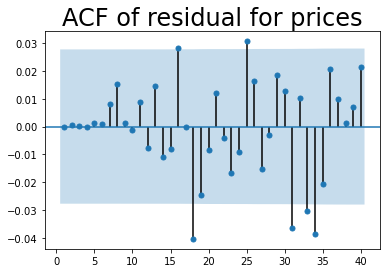

In [131]:
sgt.plot_acf(df['resid_price'],lags=40,zero=False)
plt.title('ACF of residual for prices', size=24)
plt.show()

In [132]:
## the coeff are indeed very close to zero (not sig diff from 0) -- incdicated by their falling within the blue region
## this fits the characteristics of white noise

## the few points that fall outside this area lead us to beleve us that there is a even better predictor


In [133]:
## we must plot the values of the residuals to see if they resemble what we use to expecting from white nosie dta

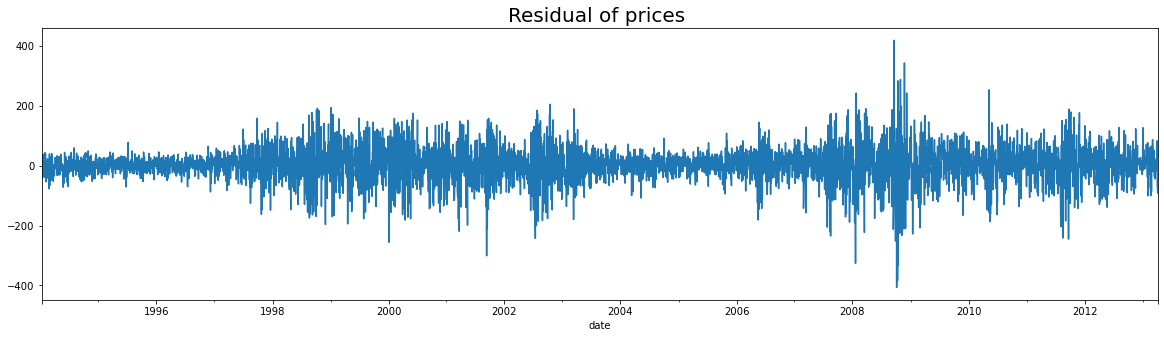

In [134]:
df['resid_price'].plot(figsize=(20,5))
plt.title('Residual of prices ',fontsize=20)
plt.show()

In [135]:
 ## looks nothing like we had for prices ,, we cannot find any obvies pattern from the data so our choice of model seems
## correct

In [137]:
## since we are uisng AR mdoel on non-stationary data(prices) our prediciton might still be far from great 

### residual for returns

In [147]:
df['resid_return'] = result_ret_ar_6.resid # since ar_6 was better model

<ipython-input-147-d7607737d464>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_return'] = result_ret_ar_6.resid # since ar_6 was better model


In [148]:
df.resid_return.mean() # mean close to 0 

-5.371918118491896e-05

In [149]:
df.resid_return.var() # less spread

1.3559802110685009

In [154]:
## our choice of model was pretty good

In [150]:
sts.adfuller(df['resid_return'])

(-70.78379722942753,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570834112306)

In [155]:
## p-value is 0, suggest stationarity
## since white noise is stationary this is exaclty what we wanted

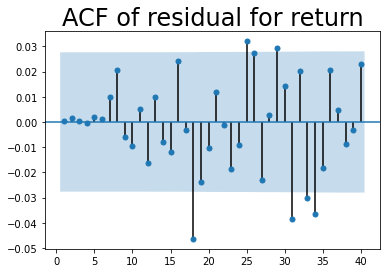

In [152]:
sgt.plot_acf(df['resid_return'],lags=40,zero=False)
plt.title('ACF of residual for return', size=24)
plt.show()

## most but not all coeff are not significant  but we have a good reson to believe a better one exist --few lie outide

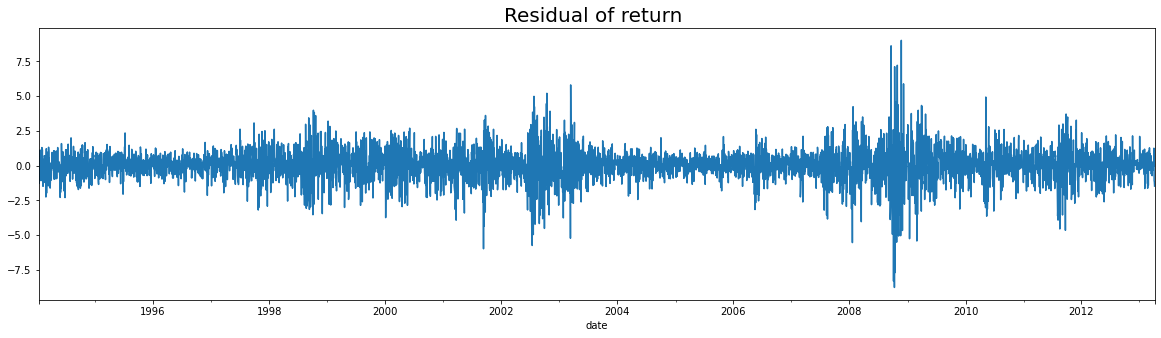

In [153]:
df['resid_return'].plot(figsize=(20,5))
plt.title('Residual of return ',fontsize=20)
plt.show()

In [ ]:
## our residual is low except at the end of 2008 ---> start of the Great Recession